<a href="https://colab.research.google.com/github/Nandan0402/weather-prediction-ml/blob/main/Simple_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
weather = pd.read_csv('weather_processed.csv', index_col = "date")

In [9]:
weather

,tmax,tmin,tavg,snwd,target,rolling_3_tmax,rolling_3_tmin,rolling_3_tavg,rolling_14_tmax,rolling_14_tmin,rolling_14_tavg
date,,,,,,,,,,,
2020-01-01,30,20,25,0,31.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-01-02,31,21,26,0,29.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-01-03,29,19,24,0,32.0,30.000000,20.000000,25.000000,0.0,0.0,0.0
2020-01-04,32,22,27,0,33.0,30.666667,20.666667,25.666667,0.0,0.0,0.0
2020-01-05,33,23,28,0,34.0,31.333333,21.333333,26.333333,0.0,0.0,0.0
2020-01-06,34,24,29,0,35.0,33.000000,23.000000,28.000000,0.0,0.0,0.0
2020-01-07,35,25,30,0,34.0,34.000000,24.000000,29.000000,0.0,0.0,0.0
2020-01-08,34,24,29,0,33.0,34.333333,24.333333,29.333333,0.0,0.0,0.0
2020-01-09,33,23,28,0,32.0,34.000000,24.000000,29.000000,0.0,0.0,0.0


In [10]:
null_pct = weather.apply(pd.isnull).sum() / weather.shape[0]

In [11]:
null_pct

,0
tmax,0.0
tmin,0.0
tavg,0.0
snwd,0.0
target,0.0
rolling_3_tmax,0.0
rolling_3_tmin,0.0
rolling_3_tavg,0.0
rolling_14_tmax,0.0
rolling_14_tmin,0.0


In [12]:
valid_columns = weather.columns[null_pct < .05]

In [13]:
valid_columns

Index(['tmax', 'tmin', 'tavg', 'snwd', 'target', 'rolling_3_tmax',
       'rolling_3_tmin', 'rolling_3_tavg', 'rolling_14_tmax',
       'rolling_14_tmin', 'rolling_14_tavg'],
      dtype='object')

In [14]:
weather = weather[valid_columns].copy()

In [15]:
weather.columns = weather.columns.str.lower()

In [16]:
weather

,tmax,tmin,tavg,snwd,target,rolling_3_tmax,rolling_3_tmin,rolling_3_tavg,rolling_14_tmax,rolling_14_tmin,rolling_14_tavg
date,,,,,,,,,,,
2020-01-01,30,20,25,0,31.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-01-02,31,21,26,0,29.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-01-03,29,19,24,0,32.0,30.000000,20.000000,25.000000,0.0,0.0,0.0
2020-01-04,32,22,27,0,33.0,30.666667,20.666667,25.666667,0.0,0.0,0.0
2020-01-05,33,23,28,0,34.0,31.333333,21.333333,26.333333,0.0,0.0,0.0
2020-01-06,34,24,29,0,35.0,33.000000,23.000000,28.000000,0.0,0.0,0.0
2020-01-07,35,25,30,0,34.0,34.000000,24.000000,29.000000,0.0,0.0,0.0
2020-01-08,34,24,29,0,33.0,34.333333,24.333333,29.333333,0.0,0.0,0.0
2020-01-09,33,23,28,0,32.0,34.000000,24.000000,29.000000,0.0,0.0,0.0


In [17]:
weather = weather.ffill()

In [18]:
weather.apply(pd.isnull).sum()

,0
tmax,0
tmin,0
tavg,0
snwd,0
target,0
rolling_3_tmax,0
rolling_3_tmin,0
rolling_3_tavg,0
rolling_14_tmax,0
rolling_14_tmin,0


In [19]:
weather.dtypes

,0
tmax,int64
tmin,int64
tavg,int64
snwd,int64
target,float64
rolling_3_tmax,float64
rolling_3_tmin,float64
rolling_3_tavg,float64
rolling_14_tmax,float64
rolling_14_tmin,float64


In [20]:
weather.index

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
      dtype='object', name='date')

In [21]:
weather.index = pd.to_datetime(weather.index)

In [22]:
weather.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', name='date', freq=None)

In [23]:
weather.index.year.value_counts().sort_index()

,count
date,
2020,10


<Axes: xlabel='date'>

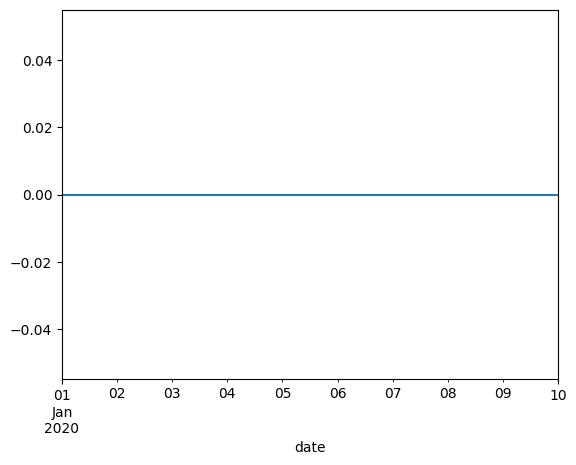

In [24]:
weather["snwd"].plot()

In [25]:
weather

,tmax,tmin,tavg,snwd,target,rolling_3_tmax,rolling_3_tmin,rolling_3_tavg,rolling_14_tmax,rolling_14_tmin,rolling_14_tavg
date,,,,,,,,,,,
2020-01-01,30,20,25,0,31.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-01-02,31,21,26,0,29.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2020-01-03,29,19,24,0,32.0,30.000000,20.000000,25.000000,0.0,0.0,0.0
2020-01-04,32,22,27,0,33.0,30.666667,20.666667,25.666667,0.0,0.0,0.0
2020-01-05,33,23,28,0,34.0,31.333333,21.333333,26.333333,0.0,0.0,0.0
2020-01-06,34,24,29,0,35.0,33.000000,23.000000,28.000000,0.0,0.0,0.0
2020-01-07,35,25,30,0,34.0,34.000000,24.000000,29.000000,0.0,0.0,0.0
2020-01-08,34,24,29,0,33.0,34.333333,24.333333,29.333333,0.0,0.0,0.0
2020-01-09,33,23,28,0,32.0,34.000000,24.000000,29.000000,0.0,0.0,0.0


In [26]:
weather["target"] = weather.shift(-1)["tmax"]

In [27]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = .1)

In [28]:
predictors = weather.columns[~weather.columns.isin(["target", "name","station"])]

In [29]:
predictors

Index(['tmax', 'tmin', 'tavg', 'snwd', 'rolling_3_tmax', 'rolling_3_tmin',
       'rolling_3_tavg', 'rolling_14_tmax', 'rolling_14_tmin',
       'rolling_14_tavg'],
      dtype='object')

In [30]:
import pandas as pd

def backtest(weather, model, predictors, start = 3650, step = 90):
  all_predictions = []

  for i in range(start, weather.shape[0], step):
    train=weather.iloc[:i,:]
    test=weather.iloc[i:(i+step),:]

    model.fit(train[predictors], train["target"])

    preds = model.predict(test[predictors])

    combined_fold = pd.DataFrame({
        "actual": test["target"],
        "prediction": preds
    }, index=test.index)

    combined_fold["diff"] = (combined_fold["actual"] - combined_fold["prediction"]).abs()
    all_predictions.append(combined_fold)

  return pd.concat(all_predictions)

In [32]:
combined_predictions = backtest(weather, rr, predictors, start=3)

In [34]:
combined_predictions

,actual,prediction,diff
date,,,
2020-01-04,33.0,26.354301,6.645699
2020-01-05,34.0,24.458322,9.541678
2020-01-06,35.0,22.530696,12.469304
2020-01-07,34.0,20.624168,13.375832
2020-01-08,33.0,22.488501,10.511499
2020-01-09,32.0,24.373931,7.626069
2020-01-10,NaN,26.280459,NaN


In [37]:
from sklearn.metrics import mean_absolute_error

cleaned_predictions = combined_predictions.dropna()
mean_absolute_error(cleaned_predictions["actual"], cleaned_predictions["prediction"])

10.0283468277009

In [33]:
combined_predictions["diff"].mean()

np.float64(10.0283468277009)

In [38]:
def pct_diff(old,new):
  return (new - old) / old

def compute_rolling(weather, horizon,col):
  label = f"rolling_{horizon}_{col}"

  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"]=pct_diff(weather[label],weather[col])
  return weather

rolling_horizon = [3,14]
for horizon in rolling_horizon:
  for col in ["tmax","tmin","tavg"]:
    weather = compute_rolling(weather, horizon, col)

In [39]:
weather=weather.fillna(0)

In [40]:
def expand_mean(df):
  return df.expanding(1).mean()

for col in ["tmax","tmin","tavg"]:
  weather[f"expanding_mean_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
  weather[f"expanding_mean_{col}_pct"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [41]:
weather

,tmax,tmin,tavg,snwd,target,rolling_3_tmax,rolling_3_tmin,rolling_3_tavg,rolling_14_tmax,rolling_14_tmin,...,rolling_3_tavg_pct,rolling_14_tmax_pct,rolling_14_tmin_pct,rolling_14_tavg_pct,expanding_mean_tmax,expanding_mean_tmax_pct,expanding_mean_tmin,expanding_mean_tmin_pct,expanding_mean_tavg,expanding_mean_tavg_pct
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,30,20,25,0,31.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,30.000000,30.0,20.000000,20.0,25.000000,25.0
2020-01-02,31,21,26,0,29.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,30.500000,31.0,20.500000,21.0,25.500000,26.0
2020-01-03,29,19,24,0,32.0,30.000000,20.000000,25.000000,0.0,0.0,...,-0.040000,0.0,0.0,0.0,30.000000,29.0,20.000000,19.0,25.000000,24.0
2020-01-04,32,22,27,0,33.0,30.666667,20.666667,25.666667,0.0,0.0,...,0.051948,0.0,0.0,0.0,30.500000,32.0,20.500000,22.0,25.500000,27.0
2020-01-05,33,23,28,0,34.0,31.333333,21.333333,26.333333,0.0,0.0,...,0.063291,0.0,0.0,0.0,31.000000,33.0,21.000000,23.0,26.000000,28.0
2020-01-06,34,24,29,0,35.0,33.000000,23.000000,28.000000,0.0,0.0,...,0.035714,0.0,0.0,0.0,31.500000,34.0,21.500000,24.0,26.500000,29.0
2020-01-07,35,25,30,0,34.0,34.000000,24.000000,29.000000,0.0,0.0,...,0.034483,0.0,0.0,0.0,32.000000,35.0,22.000000,25.0,27.000000,30.0
2020-01-08,34,24,29,0,33.0,34.333333,24.333333,29.333333,0.0,0.0,...,-0.011364,0.0,0.0,0.0,32.250000,34.0,22.250000,24.0,27.250000,29.0
2020-01-09,33,23,28,0,32.0,34.000000,24.000000,29.000000,0.0,0.0,...,-0.034483,0.0,0.0,0.0,32.333333,33.0,22.333333,23.0,27.333333,28.0


In [42]:
predictors = weather.columns[~weather.columns.isin(["target", "name","station"])]

In [43]:
predictors

Index(['tmax', 'tmin', 'tavg', 'snwd', 'rolling_3_tmax', 'rolling_3_tmin',
       'rolling_3_tavg', 'rolling_14_tmax', 'rolling_14_tmin',
       'rolling_14_tavg', 'rolling_3_tmax_pct', 'rolling_3_tmin_pct',
       'rolling_3_tavg_pct', 'rolling_14_tmax_pct', 'rolling_14_tmin_pct',
       'rolling_14_tavg_pct', 'expanding_mean_tmax', 'expanding_mean_tmax_pct',
       'expanding_mean_tmin', 'expanding_mean_tmin_pct', 'expanding_mean_tavg',
       'expanding_mean_tavg_pct'],
      dtype='object')

In [44]:
combined_predictions_2 = backtest(weather, rr, predictors, start=3)

In [45]:
mean_absolute_error(combined_predictions_2["actual"],combined_predictions_2["prediction"])

12.281067858486015

In [46]:
combined_predictions_2.sort_values("diff",ascending=False)

,actual,prediction,diff
date,,,
2020-01-10,0.0,25.745783,25.745783
2020-01-07,34.0,20.669379,13.330621
2020-01-06,35.0,22.638899,12.361101
2020-01-08,33.0,22.278581,10.721419
2020-01-05,34.0,24.626535,9.373465
2020-01-09,32.0,23.977918,8.022082
2020-01-04,33.0,26.586997,6.413003


<Axes: xlabel='diff'>

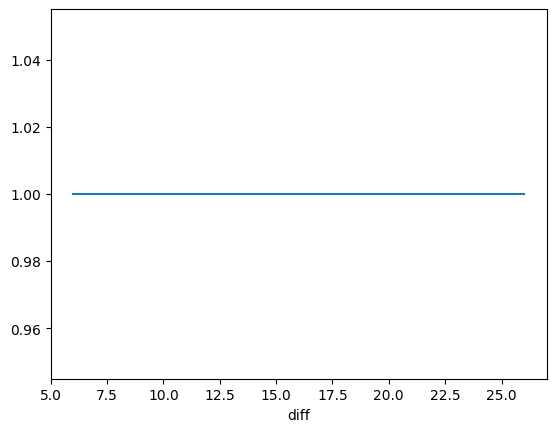

In [47]:
combined_predictions_2["diff"].round().value_counts().sort_index().plot()

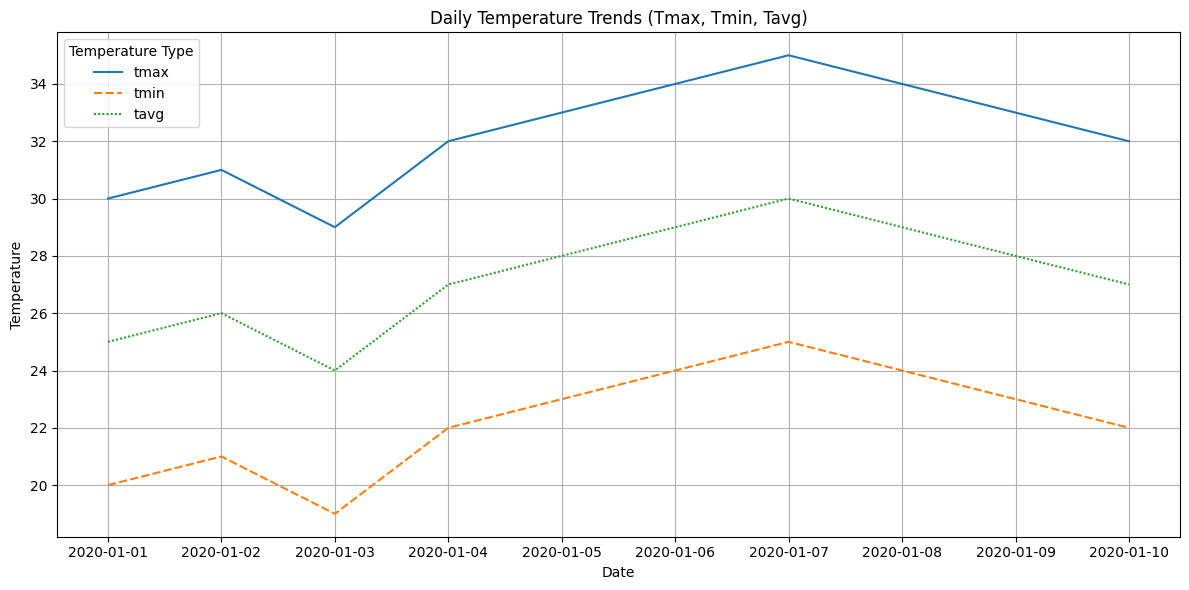

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=weather[['tmax', 'tmin', 'tavg']])
plt.title('Daily Temperature Trends (Tmax, Tmin, Tavg)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend(title='Temperature Type')
plt.tight_layout()
plt.show()

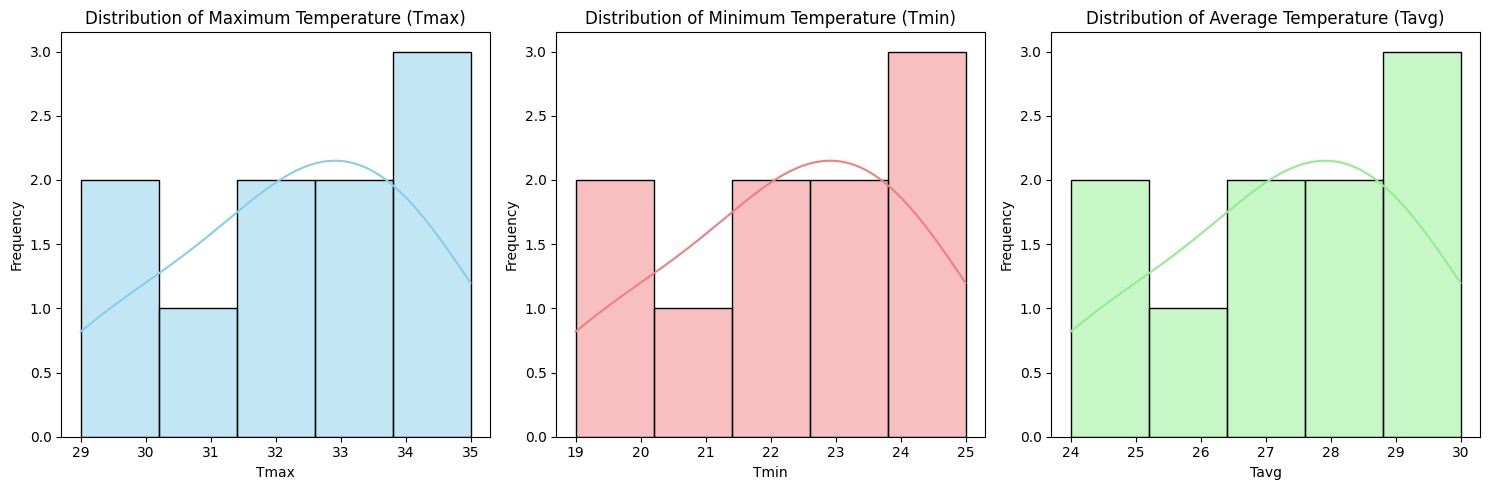

In [49]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(weather['tmax'], kde=True, color='skyblue')
plt.title('Distribution of Maximum Temperature (Tmax)')
plt.xlabel('Tmax')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(weather['tmin'], kde=True, color='lightcoral')
plt.title('Distribution of Minimum Temperature (Tmin)')
plt.xlabel('Tmin')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(weather['tavg'], kde=True, color='lightgreen')
plt.title('Distribution of Average Temperature (Tavg)')
plt.xlabel('Tavg')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

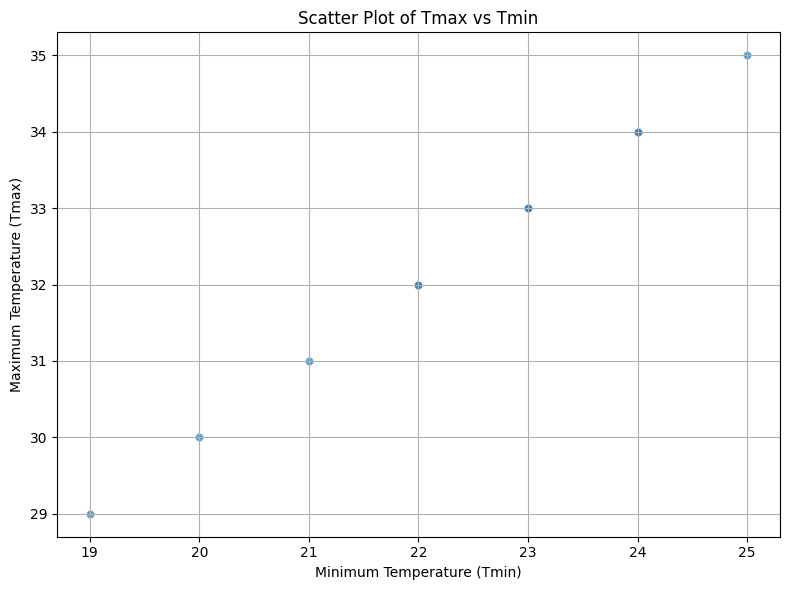

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tmin', y='tmax', data=weather, alpha=0.7)
plt.title('Scatter Plot of Tmax vs Tmin')
plt.xlabel('Minimum Temperature (Tmin)')
plt.ylabel('Maximum Temperature (Tmax)')
plt.grid(True)
plt.tight_layout()
plt.show()

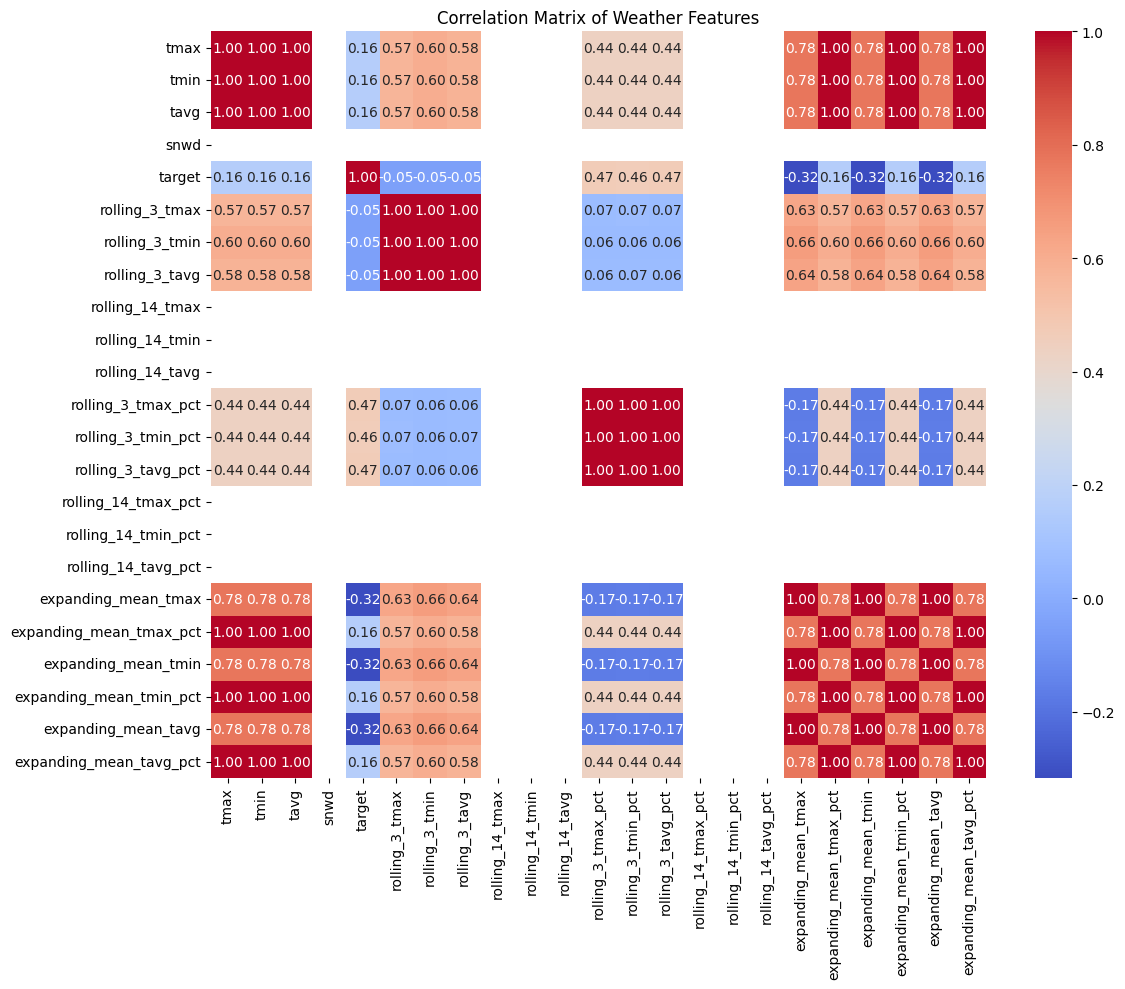

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(weather.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Features')
plt.tight_layout()
plt.show()